# Simulation with ESG module

Modelling stocks with GBM and rates with Ornstein–Uhlenbeck SDE <br>
GBM:           $dS = \mu S dt + \sigma S dB$ <br>
O-U (Vasicek): $dr = a(\mu - r) dt + \sigma dB$

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from source.noise import NoiseGenerator
from source.esg import EconomicScenarioGenerator

Simulation parameters

In [2]:
with open('./data/params.pkl', 'rb') as f:
     s0, Corr, variance, mean, ar = pickle.load(f)

In [3]:
s0

AK_SV            224.480000
AK_WORLD        4041.233665
AK_WORLD_LOC     591.744572
ALTERNATIVA      100.000000
CPI              278.000000
FASTIGHETER      100.400000
KRED_SV          196.460000
RB_UTL           329.810800
RB_SV_1_RATE       0.029400
RB_SV_5            0.039880
RB_SV_15           0.048920
SPREAD             0.003790
Name: 2003-12-31, dtype: float64

In [4]:
s0['AK_WORLD'] = s0['AK_WORLD'] / 10

In [5]:
S0 = s0.to_numpy()
a = ar.to_numpy()
mu = mean.to_numpy()
sigma = np.sqrt(variance.to_numpy())

In [6]:
N = 1
interval = 12
T = 5
steps = interval * T

In [7]:
NG = NoiseGenerator()
dB = NG.brown_steps(Corr, N * steps)

In [8]:
ESG = EconomicScenarioGenerator(S0, a, mu, sigma, dB)
S1, R1 = ESG.get_scenarios(N, steps, interval)

### Stocks

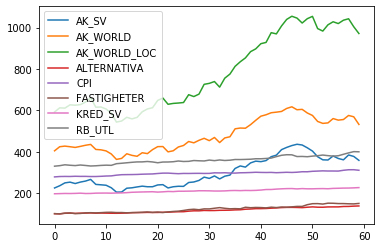

In [9]:
i = 0
for s in S1[0]:
    plt.plot(s, label=s0.index[np.where(a == 0)[0][i]])
    i += 1
plt.legend()

### Rates

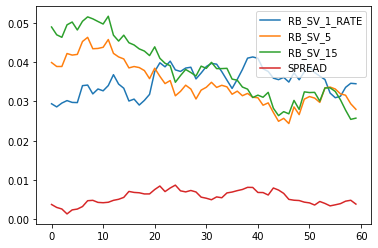

In [10]:
i = 0
for r in R1[0]:
    plt.plot(r, label=s0.index[np.where(a != 0)[0][i]])
    i += 1
plt.legend()

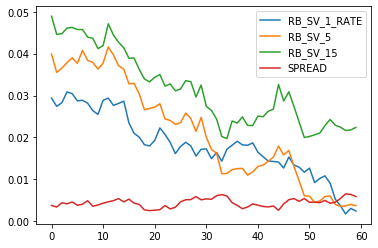

In [11]:
dB = NG.brown_steps(Corr, N * steps)
ESG = EconomicScenarioGenerator(S0, a, mu, sigma, dB)
S1, R1 = ESG.get_scenarios(N, steps, interval)
i = 0
for r in R1[0]:
    plt.plot(r, label=s0.index[np.where(a != 0)[0][i]])
    i += 1
plt.legend()